In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

In [45]:
df_web=pd.read_csv("../data/cleaned/cleaned_file")

In [46]:
df_web

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [47]:
# VISIT_IDs

# We noticed that visit_id is not unique per client. It appear to be an inconsitance in our database, so lets remove it


client_per_visit = df_web.groupby("visit_id")["client_id"].nunique().reset_index().sort_values("client_id", ascending=False).rename({"client_id":"n_unique_clients"}, axis=1)


visits_to_drop = client_per_visit[client_per_visit["n_unique_clients"]>1]["visit_id"].unique()

In [48]:
df_web = df_web[~df_web["visit_id"].isin(visits_to_drop)]
df_web

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


- For completion rate, we are to calculate the proportion of Visits where our clients reached "confirm" step

CR = # visits_reached_confirm / #visits

In [49]:
df_web["process_step_encoded"] = df_web["process_step"].map({"start":0, "step_1":1, "step_2":2, "step_3":3, "confirm":4})
df_web.head()

C:\Users\prodd\AppData\Local\Temp\ipykernel_18292\1148101315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web["process_step_encoded"] = df_web["process_step"].map({"start":0, "step_1":1, "step_2":2, "step_3":3, "confirm":4})


,client_id,visitor_id,visit_id,process_step,date_time,Variation,process_step_encoded
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,3
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,2
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,3
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,2
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,3


In [50]:
df_completion = df_web.groupby(["visit_id", "Variation"])["process_step_encoded"].max().reset_index()

df_completion["completed"] = df_completion["process_step_encoded"] == 4
df_completion

,visit_id,Variation,process_step_encoded,completed
0,100012776_37918976071_457913,Test,4,True
1,100019538_17884295066_43909,Test,4,True
2,100022086_87870757897_149620,Test,4,True
3,100030127_47967100085_936361,Control,0,False
4,100037962_47432393712_705583,Control,1,False
...,...,...,...,...
68958,999971096_28827267783_236076,Test,4,True
68959,999976049_95772503197_182554,Test,4,True
68960,999984454_18731538378_781808,Test,4,True
68961,999985675_64610694964_443659,Control,4,True


In [51]:
# some visits seems to be mapped to both TEST and CONTROL
# we want to drop them, since we cant mapped them properly

### FIXED above

In [52]:
df_completion

,visit_id,Variation,process_step_encoded,completed
0,100012776_37918976071_457913,Test,4,True
1,100019538_17884295066_43909,Test,4,True
2,100022086_87870757897_149620,Test,4,True
3,100030127_47967100085_936361,Control,0,False
4,100037962_47432393712_705583,Control,1,False
...,...,...,...,...
68958,999971096_28827267783_236076,Test,4,True
68959,999976049_95772503197_182554,Test,4,True
68960,999984454_18731538378_781808,Test,4,True
68961,999985675_64610694964_443659,Control,4,True


In [53]:
completion_tab = pd.crosstab(df_completion["Variation"], df_completion["completed"])
completion_tab

completed,False,True
Variation,,
Control,16123,15892
Test,15390,21558


In [54]:
print("Proportions of visits that reach confirm step in Control", 15892/(16123+15892))

Proportions of visits that reach confirm step in Control 0.49639231610182727


In [55]:
print("Proportions of visits that reach confirm step in Test", 21558/(21558+15390))

Proportions of visits that reach confirm step in Test 0.5834686586554076


In [56]:
## Hypothesis Testing ---> """"to prove"""" that the differences we're seeing are significant (dont happen due to random chance)

# 1. Check for independence on Variation and Completed - Chisquare test

# 2. Proportion-z-test

In [57]:
# 1. Check for independence on Variation and Completed - Chisquare test

# H0: Variation and Completion are independent

# H1: Variation and Completion are dependent

# sl = 0.05


st.chi2_contingency(completion_tab)

Chi2ContingencyResult(statistic=np.float64(523.7554448828827), pvalue=np.float64(6.449123953301238e-116), dof=1, expected_freq=array([[14629.42005133, 17385.57994867],
       [16883.57994867, 20064.42005133]]))

In [58]:
completion_tab

completed,False,True
Variation,,
Control,16123,15892
Test,15390,21558


In [59]:
# 2. Proportion-z-test
from statsmodels.stats.proportion import proportions_ztest

# H0: prop_completion Test = prop_completion Control
# H1: prop_completion Test != prop_completion Control

count = [completion_tab.loc["Test", True], completion_tab.loc["Control", True]]
nobs = [completion_tab.loc["Test"].sum(), completion_tab.loc["Control"].sum()]


proportions_ztest(count = count,
                  nobs = nobs)

(np.float64(22.89336786565089), np.float64(5.40966446522552e-116))

In [60]:
# Extra - Completion Rate with a Cost-Effectiveness Threshold 5%


# H0: prop_completion Test - prop_completion Control >= 0.05
# H1: prop_completion Test - prop_completion Control < 0.05

# sl = 0.05

proportions_ztest(count = count,
                  nobs = nobs,
                  value = 0.05,
                  alternative="smaller")

(np.float64(9.74779514504426), np.float64(1.0))

In [61]:
print("We fail to reject that the difference of completion proportions is bigger than 5%! Threshold verified!")

We fail to reject that the difference of completion proportions is bigger than 5%! Threshold verified!


##### ERROR RATE

Error Rates: If there's a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [62]:
df_web.sort_values(by=["visit_id", "date_time"], inplace=True)

C:\Users\prodd\AppData\Local\Temp\ipykernel_18292\2523314381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web.sort_values(by=["visit_id", "date_time"], inplace=True)


In [63]:
df_web["step_diff"] = df_web.groupby("visit_id")["process_step_encoded"].diff()
df_web.head()

C:\Users\prodd\AppData\Local\Temp\ipykernel_18292\1082758415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web["step_diff"] = df_web.groupby("visit_id")["process_step_encoded"].diff()


,client_id,visitor_id,visit_id,process_step,date_time,Variation,process_step_encoded,step_diff
106314,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4,NaN
106313,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4,0.0
235345,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,0,NaN
235344,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,1,1.0
235343,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,2,1.0


In [64]:
df_error = df_web.groupby(["visit_id", "Variation"])["step_diff"].min().reset_index()
df_error

,visit_id,Variation,step_diff
0,100012776_37918976071_457913,Test,0.0
1,100019538_17884295066_43909,Test,-1.0
2,100022086_87870757897_149620,Test,1.0
3,100030127_47967100085_936361,Control,NaN
4,100037962_47432393712_705583,Control,-1.0
...,...,...,...
68958,999971096_28827267783_236076,Test,0.0
68959,999976049_95772503197_182554,Test,0.0
68960,999984454_18731538378_781808,Test,1.0
68961,999985675_64610694964_443659,Control,1.0


In [65]:
df_web["is_error"] = df_error["step_diff"]<0

C:\Users\prodd\AppData\Local\Temp\ipykernel_18292\3073542070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web["is_error"] = df_error["step_diff"]<0


In [66]:
df_error["is_error"] = df_error["step_diff"]<0
df_error

,visit_id,Variation,step_diff,is_error
0,100012776_37918976071_457913,Test,0.0,False
1,100019538_17884295066_43909,Test,-1.0,True
2,100022086_87870757897_149620,Test,1.0,False
3,100030127_47967100085_936361,Control,NaN,False
4,100037962_47432393712_705583,Control,-1.0,True
...,...,...,...,...
68958,999971096_28827267783_236076,Test,0.0,False
68959,999976049_95772503197_182554,Test,0.0,False
68960,999984454_18731538378_781808,Test,1.0,False
68961,999985675_64610694964_443659,Control,1.0,False


In [80]:
pd.crosstab(df_web["Variation"], df_web["is_error"])

is_error,False,True
Variation,,
Control,21905,6799
Test,30195,9428


In [67]:
error_variation = pd.crosstab(df_error["Variation"], df_error["is_error"])
error_variation

is_error,False,True
Variation,,
Control,25540,6475
Test,27034,9914


In [68]:
print("The proportion of errors in Control is ", 6475/(6475+25540))

print("The proportion of errors in Test is ", 9914/(9914+27034))

The proportion of errors in Control is  0.20224894580665312
The proportion of errors in Test is  0.2683230486088557


In [69]:
# H0: Variation and Errors are independent
# H1: Variation and Errors are dependent

#sl = 0.05

st.chi2_contingency(error_variation)

Chi2ContingencyResult(statistic=np.float64(412.96797709429654), pvalue=np.float64(8.280941097183503e-92), dof=1, expected_freq=array([[24406.66168815,  7608.33831185],
       [28167.33831185,  8780.66168815]]))

In [70]:
# 2. Proportion-z-test
from statsmodels.stats.proportion import proportions_ztest

# H0: prop_errors Test = prop_errors Control
# H1: prop_errors Test != prop_errors Control


count = [error_variation.loc["Test", True], error_variation.loc["Control", True]]
nobs = [error_variation.loc["Test"].sum(), error_variation.loc["Control"].sum()]


proportions_ztest(count = count,
                  nobs = nobs)

(np.float64(20.33058288094039), np.float64(6.897823090048048e-92))

##### Time spent each step

In [71]:
df_web["date_time"] = pd.to_datetime(df_web["date_time"])

C:\Users\prodd\AppData\Local\Temp\ipykernel_18292\2402432093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web["date_time"] = pd.to_datetime(df_web["date_time"])


In [72]:
df_web["time_diff"] = df_web.groupby(["Variation", "visit_id"])["date_time"].diff()

C:\Users\prodd\AppData\Local\Temp\ipykernel_18292\1938786736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web["time_diff"] = df_web.groupby(["Variation", "visit_id"])["date_time"].diff()


In [73]:
df_web["time_diff"] = df_web["time_diff"].dt.total_seconds()

C:\Users\prodd\AppData\Local\Temp\ipykernel_18292\3733483331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web["time_diff"] = df_web["time_diff"].dt.total_seconds()


In [74]:
time_per_step = df_web.groupby(["Variation","process_step"])["time_diff"].mean().reset_index()
time_per_step

,Variation,process_step,time_diff
0,Control,confirm,130.524927
1,Control,start,174.181926
2,Control,step_1,43.342610
3,Control,step_2,38.895414
4,Control,step_3,94.365122
5,Test,confirm,129.685373
6,Test,start,151.287686
7,Test,step_1,37.833715
8,Test,step_2,48.442835
9,Test,step_3,97.570591


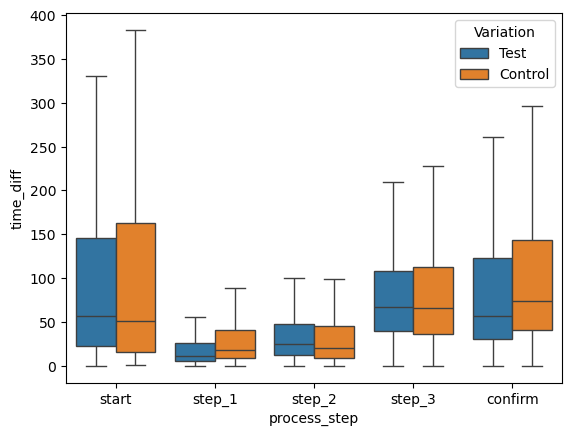

In [75]:
sns.boxplot(data = df_web, x = "process_step", y = "time_diff", showfliers = False, hue = "Variation", order = ["start", "step_1", "step_2", "step_3", "confirm"])
plt.show()

In [76]:
### We are not excluding any extreme datapoint, maybe we should! Conclusions can differ!


def remove_outliers(series, scale = 1.5):
    IQR = series.quantile(0.75) - series.quantile(0.25)
    lower_bound = series.quantile(0.25) - scale * IQR
    upper_bound = series.quantile(0.75) + scale * IQR

    return series[series.between(lower_bound, upper_bound)]

In [77]:
## HYPOTHESIS TESTING

# STEP 1

# H0: mu step_1 Test = mu step_1 Control
# H1: mu step_1 Test != mu step_1 Control

# sl = 0.05

time_step1_test = df_web[(df_web["process_step"]=="confirm") & (df_web["Variation"]=="Test")]["time_diff"].dropna()
time_step1_control = df_web[(df_web["process_step"]=="confirm") & (df_web["Variation"]=="Control")]["time_diff"].dropna()

st.ttest_ind(time_step1_test, time_step1_control)

TtestResult(statistic=np.float64(-0.36368740601330624), pvalue=np.float64(0.7160934552380795), df=np.float64(38319.0))

In [78]:
df_web

,client_id,visitor_id,visit_id,process_step,date_time,Variation,process_step_encoded,step_diff,is_error,time_diff
106314,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4,NaN,NaN,NaN
106313,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4,0.0,NaN,52.0
235345,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,0,NaN,NaN,NaN
235344,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,1,1.0,NaN,16.0
235343,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,2,1.0,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...
95173,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,0,NaN,NaN,NaN
95172,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,1,1.0,NaN,11.0
95171,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,2,1.0,NaN,54.0
95170,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,1,-1.0,NaN,44.0


In [79]:
#df_web.to_csv("final_file",index=False)